En "Barabasi - etiquetar" y "Branching process - etiquetar" se comprueba que si, se tiene un arbol (generado con branching process o barabasi) etiquetado con una cadena de markov, entonces la proporcion de las etiquetas en los nodos va de acuerdo con la distribución limite.

Aca, se asume que el etiquetado de subjects en math-geneaogy sigue el proceso de una cadena de markov, se estima la cadena de markoc, se quiere ver si la distribucion limite de la cadena de matkov estimada es igual a la proporcion de las etiquetas en los nodos

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
import seaborn as sns
import scipy
import json
import nltk
import sys

Se tienen los datos descargados en una carpeta

In [2]:
carpeta_datos = '.\\Datos math-genealogy\\'

In [3]:
# leer los datos
with open(carpeta_datos + 'data.json', 'r') as infile:
    data_dict = json.load(infile)
    
# llaves de data_dict, que es el arhivo leido
data_dict.keys()

dict_keys(['nodes'])

La unica llave es 'nodes', todos los datos estan ahi

In [4]:
datos_lista = data_dict['nodes']
print(f"Se tienen {len(datos_lista)} matematicos")

Se tienen 297377 matematicos


datos_lista es una lista de matematicos


cada uno representado como un diccionario
donde las llaves son los campos y las llaves los valores

In [5]:
datos_lista[4]

{'id': 113793,
 'name': 'Johan Lodewijk Hendrik Jonker',
 'thesis': 'Stroomverdeeling in versterkerbuizen',
 'school': 'Technische Universiteit Delft',
 'country': 'Netherlands',
 'year': 1942,
 'subject': '78—Optics, electromagnetic theory',
 'advisors': [113601],
 'students': []}

Transformar estos datos en un diccionario.

Las llaves van a ser los id's, los valores van a ser el diccionario el matematico.

De este modo se pueden buscar a los matematicos por su id, de forma facil

In [6]:
# diccionario donde poner los datos
datos = dict()

# iterar en los diccionarios de los matematicos
for matematico in datos_lista:
    # tomar el id
    id_m = matematico['id']
    # agregar la entrada al diccionario
    datos[id_m] = matematico
    

# comprobar cuantos se tienen
print(f"Se tienen {len(datos)} matematicos")

Se tienen 297377 matematicos


Ahora se acceden a los diccionarios de los matematicos con los id's

In [7]:
datos[112114]

{'id': 112114,
 'name': 'Jacobus Cornelius Kapteyn',
 'thesis': 'Onderzoek der trillende platte vliezen',
 'school': 'Universiteit Utrecht',
 'country': 'Netherlands',
 'year': 1875,
 'subject': '70—Mechanics of particles and systems',
 'advisors': [112106],
 'students': [112159,
  113801,
  299071,
  113802,
  113803,
  113804,
  112160,
  113805,
  113806]}

### Ver los años de los matematicos

Ver de que año son los matematicos

In [8]:
# por cada matematico, ver su año
años_matematicos = []

# iterar en los matematicos
for id_mat, info_mat in datos.items():
    
    # si tiene año 
    if info_mat['year'] is not None:
        # agregar el año
        años_matematicos.append(info_mat['year'])
        
# ver de que porcentaje se sabe el año
print(f"De los {len(datos)} matematicos se tiene el año para {len(años_matematicos)}")

De los 297377 matematicos se tiene el año para 243161


Filtrar de acuerdo al año

In [9]:
año_minimo = -1

# ver cuantos se eliminan
eliminados = 0

# iterar en los matematicos
for id_mat, info_mat in list(datos.items()):
    
    # si el año es no nulo y es menor al año minimo
    if info_mat['year'] is not None and info_mat['year'] < año_minimo:
        # quitar ese matematico
        del datos[id_mat]
        eliminados = eliminados + 1
        
print(f"Se eliminaron {eliminados} matematicos")

Se eliminaron 0 matematicos


## Conservar solo los matematicos con subject

Primero se guardan en una lista los id's de los matematicos con subject

In [10]:
ids_con_subject = []

# iterar en los matematicos
for id_mat, info_mat in datos.items():
    
    # checar si tiene subject
    if info_mat['subject'] is not None:
        # agregar su id
        ids_con_subject.append(id_mat)

# hacer que sea un conjunto
ids_con_subject = set(ids_con_subject)
        
# ver cuantos matematicos tienen subject
print(f"Hay {len(ids_con_subject)} matematicos con subject")

Hay 183140 matematicos con subject


Solo conservar estos matematicos, hacer un nuevo diccionario

In [11]:
# hacer un nuevo diccionario de datos
# donde solo se consideren matematicos son subject

datos_con_subject = {}

# iterar en el diccionario completo
for id_mat, info_mat in datos.items():
    
    # si el matematico tiene subject
    # se pone en el nuevo diccionario
    if id_mat in ids_con_subject:
        
        # poner su entrana en el nuevo dict
        
        # poner la entrada del diccionario anterior en el nuevo
        datos_con_subject[id_mat] = info_mat.copy()
        
        # actualizar para poner solo los advisors con subject
        datos_con_subject[id_mat]['advisors'] = [id_ for id_ in info_mat['advisors']
                                                 if id_ in ids_con_subject]
        
        # actualizar para poner solo los students con subject
        datos_con_subject[id_mat]['students'] = [id_ for id_ in info_mat['students']
                                                 if id_ in ids_con_subject]
        
# comprobar cuantos se tienen
print(f"Se tienen {len(datos_con_subject)} matematicos")

Se tienen 183140 matematicos


Comparar

In [12]:
datos[112114]

{'id': 112114,
 'name': 'Jacobus Cornelius Kapteyn',
 'thesis': 'Onderzoek der trillende platte vliezen',
 'school': 'Universiteit Utrecht',
 'country': 'Netherlands',
 'year': 1875,
 'subject': '70—Mechanics of particles and systems',
 'advisors': [112106],
 'students': [112159,
  113801,
  299071,
  113802,
  113803,
  113804,
  112160,
  113805,
  113806]}

Ese matematico tiene subject, por lo que deberia de estar en el nuevo diccionario

In [13]:
datos_con_subject[112114]

{'id': 112114,
 'name': 'Jacobus Cornelius Kapteyn',
 'thesis': 'Onderzoek der trillende platte vliezen',
 'school': 'Universiteit Utrecht',
 'country': 'Netherlands',
 'year': 1875,
 'subject': '70—Mechanics of particles and systems',
 'advisors': [],
 'students': [112159, 113801, 113802, 113803, 113804, 112160, 113805, 113806]}

Ahora aparece con menos estudiantes y sin advisor. Esto deberia de ser porque solo se conserban los que si tienen subject,
comparar esto en el diccionario original.

In [14]:
# es el advisor del matematico, que no aparece despues
# por lo que no deberia de tener subject
datos[112106]

{'id': 112106,
 'name': 'Cornelius Hubertus Carolus Grinwis',
 'thesis': 'De verdeeling der elektriciteit over het oppervlak eens geleiders',
 'school': None,
 'country': 'Netherlands',
 'year': None,
 'subject': None,
 'advisors': [100601],
 'students': [113877,
  113888,
  113878,
  113879,
  113880,
  113881,
  112114,
  65941,
  51358,
  113882,
  113883,
  113884,
  113885,
  113886,
  113889,
  113890,
  113887,
  113891]}

## Construir el arbol

Los matematicos son los nodos.

Hay una arista dirigida del matematico $i$ al matematico $j$ si 
$i$ es el advisor principal de $j$

In [15]:
# crear el grafo
grafo = nx.DiGraph()

# agregar un nodo por cada matematico
# iterar en el diccionario de matematicos con subjects
for id_mat, info_mat in datos_con_subject.items():
    
    # tomar el subject del matematico
    subj_mat = info_mat['subject']
    
    # agregar el nodo de ese matematico
    # poner el subject como atributo
    grafo.add_node(id_mat, subject = subj_mat)
    
    
# agregar las aristas
# iterar en el diccionario de matematicos con subjects
for id_mat, info_mat in datos_con_subject.items():
    
    # solo agregar arista si tiene advisors
    if len(info_mat['advisors']) >= 1:
        
        # agregar una arista dirigida
        # de su advisor principal a el
        
        # tomar los advisors
        advisors_mat = info_mat['advisors']
        # tomar el principal
        advisor_principal_mat = advisors_mat[0]
        
        # agregar la arista dirigida
        grafo.add_edge(advisor_principal_mat, id_mat)

In [16]:
print(f"El grafo es un DAG: {nx.is_directed_acyclic_graph(grafo)}")

# no es dag porque por ahi tiene self loops
# (no se que onda con esos datos, los voy a quitar)
self_loops = list(grafo.edges(data=False))
grafo.remove_edges_from([(u, v) for u, v in self_loops if u == v])

# checar otra vez
print(f"El grafo es un DAG: {nx.is_directed_acyclic_graph(grafo)}")

El grafo es un DAG: False
El grafo es un DAG: True


In [17]:
print(f"Se tienen {grafo.number_of_nodes()} nodos")
print(f"Se tienen {grafo.number_of_edges()} edges")

Se tienen 183140 nodos
Se tienen 118968 edges


Ver información de la conectividad del grafo

In [18]:
# Ver el numero de compoentes conexos debiles
num_c_c_weak = nx.number_weakly_connected_components(grafo)
print(f"Numero de componentes conexos debiles: {num_c_c_weak}")

Numero de componentes conexos debiles: 64172


Eliminar nodos aislados del grafo

In [19]:
# identificar nodos aislados
isolated_nodes = [node for node in grafo.nodes() if 
                  (grafo.in_degree(node) == 0 and grafo.out_degree(node) == 0)]

# eliminarlos
grafo.remove_nodes_from(isolated_nodes)

Volver a ver info de la conectividad y del grafo

In [20]:
print(f"Se tienen {grafo.number_of_nodes()} nodos")
print(f"Se tienen {grafo.number_of_edges()} edges")

# Ver el numero de compoentes conexos debiles
num_c_c_weak = nx.number_weakly_connected_components(grafo)
print(f"Numero de componentes conexos debiles: {num_c_c_weak}")

Se tienen 131668 nodos
Se tienen 118968 edges
Numero de componentes conexos debiles: 12700


In [21]:
# tomar los componentes conexos debiles
weakly_connected_components = list(nx.weakly_connected_components(grafo))

# tomar el tamaño de cada uno
component_sizes = [len(component) for component in weakly_connected_components]

In [22]:
# ver los tamaños de los mayores
k=400
print(f"Los {k} mayores componentes tienen tamaños: ")
for size in sorted(component_sizes, reverse = True)[:k]:
    print(size)

Los 400 mayores componentes tienen tamaños: 
1938
1821
1688
1283
1049
964
945
909
757
620
546
538
528
437
386
384
354
352
335
333
328
327
322
317
315
312
310
300
283
282
279
260
255
247
240
236
234
233
231
226
224
223
223
222
221
214
207
206
202
197
194
190
189
189
186
184
182
178
177
177
177
175
174
174
172
171
169
165
163
162
160
158
157
156
155
152
152
152
151
149
148
147
145
144
143
142
141
139
138
136
136
135
134
132
131
130
129
128
127
126
124
123
122
122
120
119
118
118
118
118
117
117
115
115
114
113
113
111
111
110
110
109
109
108
108
108
107
107
107
107
105
104
102
101
100
99
98
98
98
97
97
96
96
94
94
93
93
93
93
91
91
90
89
89
89
89
88
88
88
87
87
87
87
86
86
86
85
85
85
85
85
85
84
84
84
83
83
83
83
82
82
82
82
81
81
81
81
80
80
79
79
79
79
79
78
78
78
78
77
77
77
77
77
77
75
75
74
74
74
74
74
73
73
73
72
71
71
71
71
71
70
70
70
70
70
70
70
70
69
69
69
68
68
68
68
67
67
67
67
67
66
66
66
65
65
65
65
64
64
64
64
64
64
64
63
63
63
63
63
63
62
62
62
62
62
62
61
61
61
60
60
60

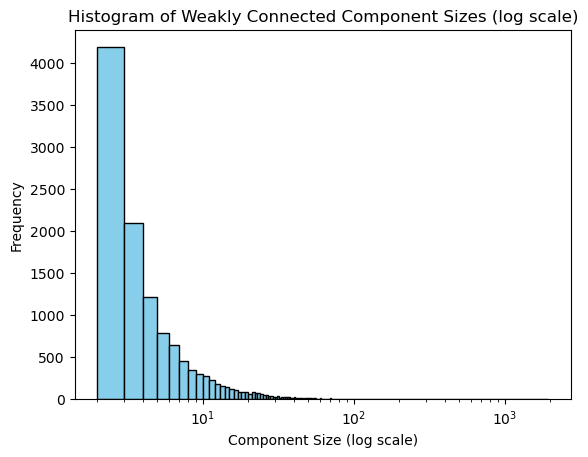

In [23]:
# visualizar las frecuencias en un histograma
plt.hist(component_sizes, bins= range(min(component_sizes), max(component_sizes) + 1), 
         color='skyblue', edgecolor='black')

# poner el eje x en log
plt.xscale('log')

plt.xlabel('Component Size (log scale)')
plt.ylabel('Frequency')
plt.title('Histogram of Weakly Connected Component Sizes (log scale)')
plt.show()

## Etiquetar los nodos usando los subjects

In [24]:
nombres_subjects = set([grafo.nodes[n]['subject'] for n in grafo.nodes()])

# hacerlo una lista ordenada
nombres_subjects = sorted(list(nombres_subjects))

# ver cuatnos hay
numero_subjects = len(nombres_subjects)

print(f"Se tienen {numero_subjects} subjects")

Se tienen 63 subjects


Hacer diccionarios para pasar de los nombres a indices y viceversa.
Estos seran los indices usados para poner las etiquetas

In [25]:
# diccionarios vacios
subj_2_idx = dict()
idx_2_subj = dict()

# iterar en la lista de los subjects
for idx, subj in enumerate(nombres_subjects):
    
    # añadir las entradas al diccionario
    subj_2_idx[subj] = idx
    idx_2_subj[idx] = subj

Funciones auxiliares

In [26]:
# ponerle una etiqueta a un nodo en un grafo
def etiquetar(nodo, indice_etiqueta, grafo):
    
    # poner la etiqueta como parte del diccionario
    # asociado a cada nodo
    # con la llave de etiqueta
    grafo.nodes[nodo]['etiqueta'] = indice_etiqueta

In [27]:
# dado un nodo de un grafo, obtener su etiqueta
def get_etiqueta(nodo, grafo):
    
    # devuelve la etiqueta de un nodo
    return grafo.nodes[nodo]['etiqueta']

In [28]:
# dado un nodo de un grafo, obtener su subject
def get_subject(nodo, grafo):
    
    # devuelve el subject de un nodo
    return grafo.nodes[nodo]['subject']

Con estos indices, poner etiquetas a los nodos.

La etiqueta de un nodo es el indice de su subject.

In [29]:
# iterar en los nodos
for nodo in grafo.nodes():
    
    # tomar el subject de ese nodo
    subject_nodo = get_subject(nodo, grafo)
    
    # tomar el indice correspondiente
    indice_etiqueta_nodo = subj_2_idx[subject_nodo]
    
    # poner la etiqueta
    etiquetar(nodo, indice_etiqueta_nodo, grafo)

## Distribucion de las hojas

In [30]:
# tomar las hojas
hojas = [node for node in grafo.nodes() if grafo.out_degree(node) == 0]
print(f"Se tienen {len(hojas)} hojas")

# obtener las etiquetas de las hojas
etiquetas_hojas = np.array([get_etiqueta(hoja, grafo) for hoja in hojas])

Se tienen 100446 hojas


In [31]:
# obtener las proporciones de las etiquetas en las hojas

proporciones_hojas = [-1] * numero_subjects

# tal que 
# proporciones_hojas[0] = proporcion de hojas con etiqueta con indice 0

for idx_etiqueta in range(numero_subjects):
    
    # obtener el numero de hojas con este indice de etiqeuta
    num_hojas = sum([1 for etiqueta_hoja in etiquetas_hojas
                    if etiqueta_hoja == idx_etiqueta])
    
    # añadir la proporcion
    # el numero de hojas con ese etiqeuta 
    # sobre el numero total del hojas
    proporciones_hojas[idx_etiqueta] = num_hojas/len(hojas)
    
    
# ver que sumen a 1
assert np.isclose(np.sum(proporciones_hojas), 1)

print("Las proporciones de las hojas son: ")
#print(proporciones_hojas)

for idx, proporcion in enumerate(proporciones_hojas):
    print(f"{round(proporcion, 3)} para la etiqueta {idx_2_subj[idx]}")

Las proporciones de las hojas son: 
0.005 para la etiqueta 00—General
0.003 para la etiqueta 01—History and biography
0.016 para la etiqueta 03—Mathematical logic and foundations
0.021 para la etiqueta 05—Combinatorics
0.002 para la etiqueta 06—Order, lattices, ordered algebraic structures
0.002 para la etiqueta 08—General algebraic systems
0.021 para la etiqueta 11—Number theory
0.001 para la etiqueta 12—Field theory and polynomials
0.005 para la etiqueta 13—Commutative rings and algebras
0.017 para la etiqueta 14—Algebraic geometry
0.004 para la etiqueta 15—Linear and multilinear algebra; matrix theory
0.008 para la etiqueta 16—Associative rings and algebras
0.003 para la etiqueta 17—Nonassociative rings and algebras
0.004 para la etiqueta 18—Category theory, homological algebra
0.001 para la etiqueta 19—K-theory
0.017 para la etiqueta 20—Group theory and generalizations
0.002 para la etiqueta 22—Topological groups, Lie groups
0.003 para la etiqueta 26—Real functions
0.001 para la et

## Distribucion de las etiquetas en todo el grafo

In [32]:
# se tienen las etiquetas de todo el arbol

# tomar los nodos
nodos = grafo.nodes()

# obtener las etiquetas de todos los nodos
etiquetas_full = np.array([get_etiqueta(node, grafo) for node in nodos])


print(f"Se tienen {len(etiquetas_full)} nodos en todo el arbol")
print("Checar la distribucion")

Se tienen 131668 nodos en todo el arbol
Checar la distribucion


In [33]:
# obtener las proporciones de las etiquetas en todo el arbol

proporciones_arbol = [-1] * numero_subjects

# tal que 
# proporciones_arbol[0] = proporcion de nodos en todo el arbol con etiqueta con indice 0


for idx_etiqueta in range(numero_subjects):
    
    # obtener el numero de nodos con este indice de etiqeuta
    num_nodos = sum([1 for etiqueta_nodo in etiquetas_full
                    if etiqueta_nodo == idx_etiqueta])
    
    # añadir la proporcion
    # el numero de nodos con ese etiqeuta 
    # sobre el numero total del nodos
    proporciones_arbol[idx_etiqueta] = num_nodos/len(etiquetas_full)
    
    
# ver que sumen a 1
assert np.isclose(np.sum(proporciones_arbol), 1)

print("Las proporciones de los nodos en el arbol son: ")
#print(proporciones_hojas)

for idx, proporcion in enumerate(proporciones_arbol):
    print(f"{round(proporcion, 3)} para la etiqueta {idx_2_subj[idx]}")

Las proporciones de los nodos en el arbol son: 
0.005 para la etiqueta 00—General
0.003 para la etiqueta 01—History and biography
0.018 para la etiqueta 03—Mathematical logic and foundations
0.021 para la etiqueta 05—Combinatorics
0.002 para la etiqueta 06—Order, lattices, ordered algebraic structures
0.002 para la etiqueta 08—General algebraic systems
0.021 para la etiqueta 11—Number theory
0.001 para la etiqueta 12—Field theory and polynomials
0.005 para la etiqueta 13—Commutative rings and algebras
0.017 para la etiqueta 14—Algebraic geometry
0.003 para la etiqueta 15—Linear and multilinear algebra; matrix theory
0.008 para la etiqueta 16—Associative rings and algebras
0.003 para la etiqueta 17—Nonassociative rings and algebras
0.004 para la etiqueta 18—Category theory, homological algebra
0.001 para la etiqueta 19—K-theory
0.018 para la etiqueta 20—Group theory and generalizations
0.003 para la etiqueta 22—Topological groups, Lie groups
0.003 para la etiqueta 26—Real functions
0.00

## Estimar la matriz de transicion de la cadena de markov

Recordar que se asume que el etiquetado viene de una cadena de markov, estimar 
la matriz de transicion de esta cadena.

In [34]:
# comprueba que una matriz es una matriz de probabilidad
# i.e que las filas suman a 1, y no tiene entradas negativas
def comprobar_matriz_probabilidad(matriz):
    
    # verificar si todas las entradas son no negativas
    if np.any(matriz < 0):
        return False
    
    # verificar si la suma de cada fila es aproximadamente igual a 1
    filas_suman_a_1 = np.all(np.isclose(np.sum(matriz, axis=1), 1))
    
    return filas_suman_a_1

In [35]:
def estimar_markov(grafo, num_etiquetas):
    '''
    Toma un grafo etiquetado
    Es decir, donde cada nodo tiene un atributo con nombre 'etiqueta'
    Las etiquetas son numeros en {0, 1, ..., num_etiquetas-1}
    Se asume que el etiquetado del grafo sigue un proceso de cadena de markov
    Se busca estimar la matriz de transicion de esta
    Se devuelve la estimacion de esta matriz de transicion
    '''

    # hacer una matriz que cuente de donde a donde van las aristas
    # inicializar la matriz con ceros
    matriz_contar = np.zeros((num_etiquetas, num_etiquetas))

    # iterar en las aristas
    for edge in grafo.edges():

        # tomar al padre, y su etiqueta
        padre = edge[0]
        etiqueta_padre = get_etiqueta(padre, grafo)

        # tomar al hijo, y su etiqueta
        hijo = edge[1]
        etiqueta_hijo = get_etiqueta(hijo, grafo)


        # sumar en uno la cuenta 
        # de las aristas que vienen de la etiqueta del padre
        # a la etiqueta del hijo
        matriz_contar[etiqueta_padre, etiqueta_hijo] = matriz_contar[etiqueta_padre, etiqueta_hijo] + 1

    # comprobar que se hayan contado todas las aristas del grafo
    assert grafo.number_of_edges() == matriz_contar.sum()

    # si una fila se llena de ceros
    # entonces no se tiene info de la proba condicional
    # se llena con unos, para que sea uniforme
    for fila in range(matriz_contar.shape[0]):
            if np.all(matriz_contar[fila, :] == 0):
                print(f"No se tenia informacion hijos cuyo padre tiene etiqueta: {fila}")
                print("La informacion condicional dada esa etiqueta se hace uniforme")
                matriz_contar[fila, :] = 1


    # para estimar las probabilidades condicionales
    # se normaliza cada fila para que sume uno
    matriz_estimada = matriz_contar / matriz_contar.sum(axis=1)[:, np.newaxis]

    # comprobar que sea matriz de probabilidad
    assert comprobar_matriz_probabilidad(matriz_estimada)

    # devolver la estimacion
    return matriz_estimada

In [36]:
def get_distribucion_limite(matriz_transicion):
    '''
    Toma la matriz de transicion de una cadena de markov
    Devuelve la distribucion limite de la cadena de markov
    
    Lo que se hace es checar si es irreducible y aperiodica.
    Pues si la cadena de markov es irreducible, aperiodica.
    Entonces la distribucion limite es la distribucion estacionaria.
    '''
    
    # comprobar que si sea de probabilidad
    assert comprobar_matriz_probabilidad(matriz_transicion)
    
    # Crear un grafo dirigido desde la matriz de transición
    grafo_markov = nx.DiGraph(matriz_transicion)
    
    # ver si es irreducible
    irreducible = nx.is_strongly_connected(grafo_markov)

    if irreducible:
        print("La cadena es irreducible")
    else:
        print("La cadena no es irreducible")
        return None
    
    # ver si es aperiodica
    is_aperiodic = nx.is_aperiodic(grafo_markov)

    if irreducible:
        print("La cadena es aperiodica")
    else:
        print("La cadena no es aperiodica")
        return None
    
    # Calcular la dsitribucion estacionaria
    
    # eigenvalores y eigenvectores
    eigenvalores, eigenvectores = np.linalg.eig(matriz_transicion.T)

    # tomar el eigenvector asociado al eigenvalor 1
    eigenvector_1 = np.real_if_close(eigenvectores[:, np.isclose(eigenvalores, 1)])

    # reshape
    eigenvector_1 = eigenvector_1.reshape(-1)

    # si suma uno es la distribucion estacionaria
    distribucion_estacionaria = eigenvector_1 / np.sum(eigenvector_1)
    
    # devolverla
    return list(distribucion_estacionaria)

Obtener la distribucion limite estimada


In [37]:
matriz_markov_estimada = estimar_markov(grafo, numero_subjects)
matriz_markov_estimada.shape

(63, 63)

In [38]:
distribucion_limite_estimada = get_distribucion_limite(matriz_markov_estimada)

La cadena es irreducible
La cadena es aperiodica


## Comparar las 3 distribuciones

Distribucion limite estimada


Distribucion de las hojas

Distribucion de todos los nodos

In [39]:
# poner las distribuciones a comparar
distribuciones = [np.array(distribucion_limite_estimada), np.array(proporciones_hojas), np.array(proporciones_arbol)]

# poner los nombres
nombres_distribuciones = ["Distribucion limite (estimada)", "Distribucion de las hojas", "Distribucion de todos los nodos"]

In [40]:
def plot_distribution(distribucion, ax):
    # toma una ditribucion sobre las etiquetas
    # la grafica
    
    # ver que tenga los mismos elementos
    assert numero_subjects==len(distribucion)
    
    # hacer las barras
    ax.bar(nombres_subjects, distribucion)
    
    ## poner los valores
    #for i, valor in enumerate(distribucion):
        #ax.text(i, valor, f'{valor:.3f}', ha='center', va='bottom')
        
    # devolevr el ax
    return ax

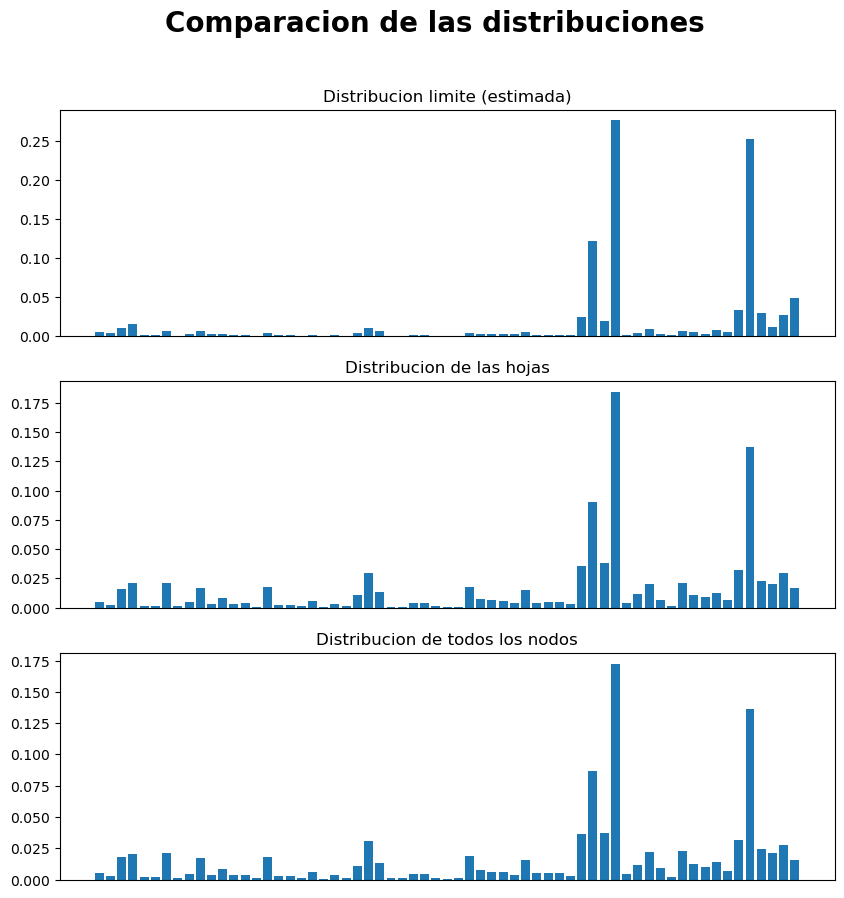

In [41]:
fig, ax = plt.subplots(3, 1, figsize = (10, 10))

# distribucion limite
plot_distribution(distribuciones[0], ax[0])
ax[0].set_title(nombres_distribuciones[0])

# distribucion de las hojas
plot_distribution(distribuciones[1], ax[1])
ax[1].set_title(nombres_distribuciones[1])

# distribucion de todos los nodos
plot_distribution(distribuciones[2], ax[2])
ax[2].set_title(nombres_distribuciones[2])

ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])

# mostrar
fig.suptitle("Comparacion de las distribuciones", fontsize=20, fontweight='bold')
plt.show()

In [42]:
# funcion para calcular la KL divergence D(p|q)
# no es una metrica, no es simetrica ni lo del triangulo, es una divergencia
def KL_divergence(p, q):
    return scipy.stats.entropy(p, q)

In [43]:
# calcular la kl_divergence de todos los pares posibles
kl_matrix = np.zeros((3, 3))

# iterar en los pares
for i in range(3):
    for j in range(3):
        # calccular la divergencia del par correspondiente
        kl_matrix[i, j] = KL_divergence(distribuciones[i], distribuciones[j])

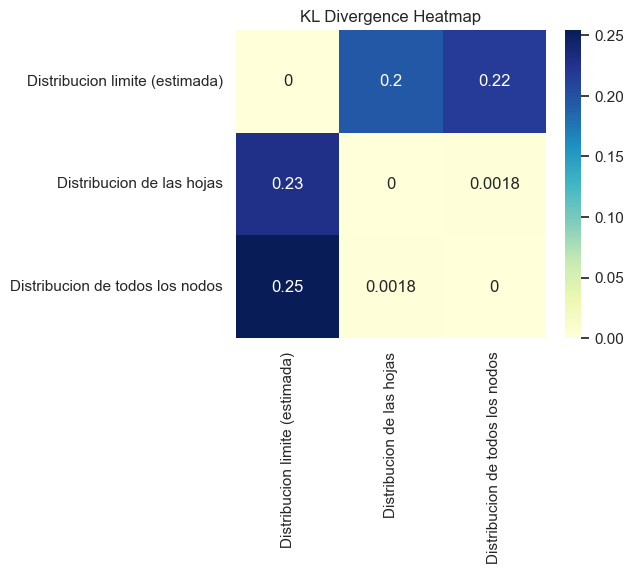

In [44]:
# Hacer un heatmap con esta informacion
sns.set()
plt.figure(figsize=(5, 4))
sns.heatmap(kl_matrix, annot=True, cmap="YlGnBu", 
            xticklabels=nombres_distribuciones, yticklabels=nombres_distribuciones)
plt.title("KL Divergence Heatmap")
plt.show()

## Ver la distribucion de hijos por nodo

Pensar esto como que depende de la etiqueta del padre

Ver si la etiqueta del padre tiene alguna influencia en la distribución de los hijos.

De este modo, se puede saber si tiene sentido pensar la generación de este arbol con un multitype branching process

In [45]:
# ver cual es el numero de hijos mayor para todos los nodos
num_hijos_mayor = 0

# iterar en los nodos
for nodo in grafo.nodes():
    
    # ver el numero de hijos
    num_hijos = grafo.out_degree(nodo)
    
    # ver si tiene mas hijos que el record hasta ahora
    if num_hijos > num_hijos_mayor:
        # actualizar
        num_hijos_mayor = num_hijos

print(f"El numero mayor de hijos para un nodo es {num_hijos_mayor}")

El numero mayor de hijos para un nodo es 164


Funcion para obtener una distribucion en el numero de hijos, cuando se da una muestra.

In [46]:
def distribucion_hijos(muestra_hijos):
    # se da una muestra del numero de hijos
    # se devuelve una distribucion (muestral)
    # el soporte de la distribucion es {0, ..., num_hijos_mayor}
    # pues es como tener una que se va a infinito, solo se corta donde es 0
    
    
    distribucion = []
    
    # iterar en el soporte, 
    for idx in range(0, num_hijos_mayor+1):
        
        # contar las ocurrancias de este evento en la muestra
        numero_ocurrencias_evento = sum([1 for n_hijos in muestra_hijos
                                         if n_hijos == idx])
        distribucion.append(numero_ocurrencias_evento)
        
    # hacer que la distribucion sea array
    distribucion = np.array(distribucion)
    
    # comprobar que el soporte sea correcto 
    assert len(distribucion) == num_hijos_mayor+1
    
    # comprobar que cuente todos los eventos
    assert sum(distribucion) == len(muestra_hijos)
    
    # normalizar para que sume 1, dividir entre el numero de eventos
    distribucion_normalizada = distribucion/len(muestra_hijos)
    
    # comprobar que suma a 1
    assert np.isclose(np.sum(distribucion_normalizada), 1)
    
    # devolver 
    return distribucion_normalizada

### Primero ver la distribucion de hijos considerando todos los nodos

In [47]:
num_hijos_total = []

# iterar en los nodos
for nodo in grafo.nodes():
    
    # ver su num de hijos y añadirlo a la lista
    num_hijos_total.append(grafo.out_degree(nodo))
    
# hacerlo array
num_hijos_total = np.array(num_hijos_total)

# obtener la distribucion
distribucion_total = distribucion_hijos(num_hijos_total)

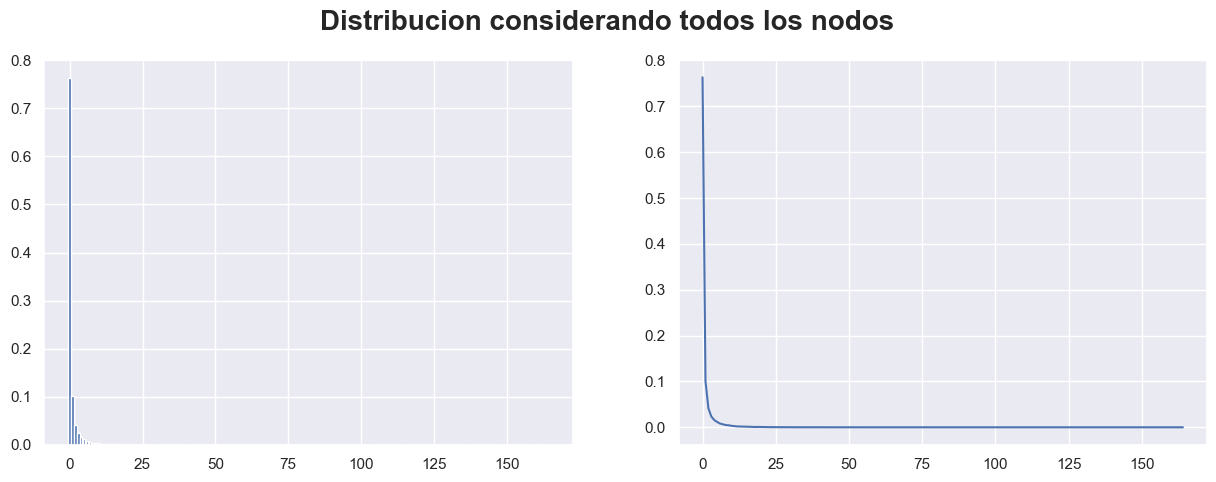

In [48]:
fig, ax = plt.subplots(1, 2, figsize = (15,5))

# hist, pero usando barplot
ax[0].bar(np.arange(len(distribucion_total)), distribucion_total)

# plot
ax[1].plot(distribucion_total)

# title
fig.suptitle("Distribucion considerando todos los nodos", fontsize=20, fontweight='bold')
plt.show()

### Obtener una distribucion de hijos segun la etiqueta del padre

In [49]:
def muestra_dada_etiqueta(etiqueta):
    # toma una etiqueta
    # ve a todos los nodos con esa etiqueta
    # obtiene una muestra sobre el numero de hijos
    
    # ir guardando la muestra de los hijos
    muestra_hijos = []

    # iterar en los nodos
    for nodo in grafo.nodes():

        # solo poreseguir si es de nuestra etiqueta deseada
        if get_etiqueta(nodo, grafo) == etiqueta:
            # añadir el numero de hijos a la muestra
            muestra_hijos.append(grafo.out_degree(nodo))

    # devolver la distribucion
    return np.array(muestra_hijos)

In [50]:
def distribucion_dada_etiqueta(etiqueta):
    # toma una etiqueta
    # ve a todos los nodos con esa etiqueta
    # obtiene una distribucion sobre el numero de hijos
    
    # tomar la muestra de hijos dada esa etiqueta
    muestra_hijos = muestra_dada_etiqueta(etiqueta)

    # ya que se tiene la muestra,
    # la cuenta de hijos,
    # obtener la distribucion 
    distribucion_etiqueta = distribucion_hijos(muestra_hijos)

    # devolver la distribucion
    return distribucion_etiqueta

In [51]:
# por cada posible etiqueta, poner su distribucion
distribuciones_subj = []

# iterar en los subjects
for subj in nombres_subjects:
    # tomar el indice
    idx_del_subj = subj_2_idx[subj]
    
    # tomar la distribucion de hijos para esa etiqueta
    # añadirla a las distribuciones
    distribuciones_subj.append(distribucion_dada_etiqueta(idx_del_subj))

# comprobar que se tengan tantas como subjects
assert len(distribuciones_subj) == numero_subjects

Hacer una matriz de heatmap para compararlas entre ellas

In [52]:
# calcular la kl_divergence de todos los pares posibles
kl_matrix_subj = np.zeros((numero_subjects, numero_subjects))

# iterar en los pares
for i in range(numero_subjects):
    for j in range(numero_subjects):
        # tomar ambas distribuciones de interes
        distribucion_1 = distribuciones_subj[i]
        distribucion_2 = distribuciones_subj[j]
        
        # calccular la divergencia del par correspondiente
        kl_matrix_subj[i, j] = KL_divergence(distribucion_1, distribucion_2)

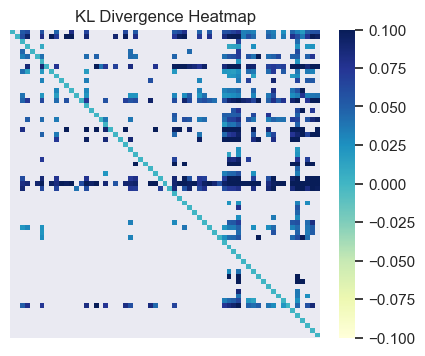

In [53]:
# Hacer un heatmap con esta informacion
sns.set()
plt.figure(figsize=(5, 4))
heatmap = sns.heatmap(kl_matrix_subj, annot=False, cmap="YlGnBu", 
            xticklabels=[], yticklabels=[])
plt.title("KL Divergence Heatmap")
plt.show()

In [54]:
kl_matrix_subj

array([[0.        ,        inf, 0.05320374, ..., 0.04911337, 0.05678969,
        0.05810193],
       [       inf, 0.        , 0.0602683 , ..., 0.07568688, 0.10017544,
        0.09538713],
       [       inf,        inf, 0.        , ...,        inf,        inf,
               inf],
       ...,
       [       inf,        inf,        inf, ..., 0.        ,        inf,
               inf],
       [       inf,        inf,        inf, ...,        inf, 0.        ,
               inf],
       [       inf,        inf,        inf, ...,        inf,        inf,
        0.        ]])

Tiene muchos infinitos, arreglar esto sumandole un pequeño numero a las distribuciones

In [55]:
# definir en numero mas peuqño posible
smallest_float = sys.float_info.epsilon

In [56]:
# calcular la kl_divergence de todos los pares posibles
kl_matrix_subj = np.zeros((numero_subjects, numero_subjects))

# iterar en los pares
for i in range(numero_subjects):
    for j in range(numero_subjects):
        # tomar ambas distribuciones de interes
        distribucion_1 = distribuciones_subj[i]
        distribucion_2 = distribuciones_subj[j]
        
        # para evitar infinitos, sumar un numero muy pequeño a ambas
        distribucion_1 = distribucion_1 + smallest_float
        distribucion_2 = distribucion_2 + smallest_float
        
        # calccular la divergencia del par correspondiente
        kl_matrix_subj[i, j] = KL_divergence(distribucion_1, distribucion_2)

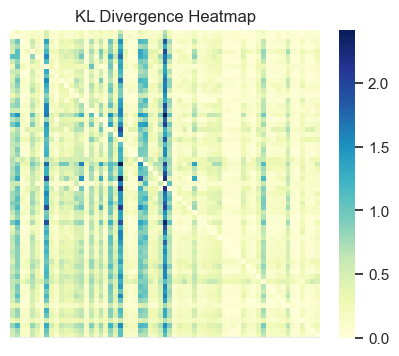

In [57]:
# Hacer un heatmap con esta informacion
sns.set()
plt.figure(figsize=(5, 4))
heatmap = sns.heatmap(kl_matrix_subj, annot=False, cmap="YlGnBu", 
            xticklabels=[], yticklabels=[])
plt.title("KL Divergence Heatmap")
plt.show()

### Seguir comparando las distribuciones sobre los hijos dependiendo la etiqueta.

In [58]:
# por cada posible etiqueta, poner la muestra del numero de hijos
muestras_subj = []

# iterar en los subjects
for subj in nombres_subjects:
    # tomar el indice
    idx_del_subj = subj_2_idx[subj]
    
    # obtener la muestra de hijos para esa etiqueta
    # añadirla a todas las muestas
    muestras_subj.append(muestra_dada_etiqueta(idx_del_subj))

In [59]:
# por cada muestra, tomar el tamaño de la muestra
tamaños_subj = np.array([len(muestras_subj[i]) for i in range(len(muestras_subj))])
tamaños_subj

array([  710,   402,  2418,  2711,   255,   258,  2789,   167,   593,
        2250,   453,  1071,   457,   479,   118,  2361,   336,   360,
         192,   811,    99,   428,   154,  1387,  4065,  1761,   132,
         144,   582,   531,   171,    63,   131,  2439,   978,   837,
         788,   517,  2082,   635,   726,   685,   407,  4809, 11416,
        4844, 22697,   617,  1525,  2866,  1174,   264,  3049,  1614,
        1272,  1809,   897,  4191, 17990,  3197,  2753,  3648,  2103])

In [60]:
# por cada muestra, tomar la media
medias_subj = np.array([muestras_subj[i].mean() for i in range(len(muestras_subj))])

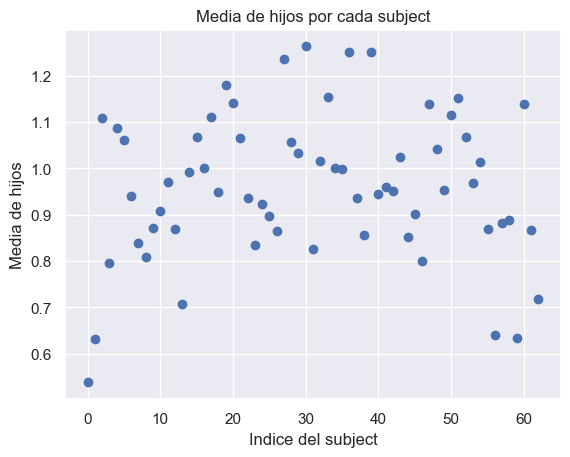

In [61]:
# visualizar las distintas medias, segun los subject
fig, ax = plt.subplots()

# graficar los indices de los subject en el eje x
# la media de hijos para ese subject en el eje y
ax.scatter(np.arange(len(nombres_subjects)), medias_subj)

plt.xlabel("Indice del subject")
plt.ylabel("Media de hijos")

plt.title("Media de hijos por cada subject")
plt.show()

## Estimar los parametros del multi-type branching process

Asumir que el grafo viene de un multi-type branching process de nuestro modelo. Se estiman los parametros, que son la matriz de transicion y las esperanzas de cada distribucion de hijos.

La matriz de transicion ya fue estimada, ademas, el estimador de maxima verosimilitud de la esperanza la media, y ya se tiene la media de cada tipo. Entonces ya estan estimados los parametros.


In [62]:
# matri de transicion
matriz_markov_estimada.shape

(63, 63)

Poner los parametros en la forma en la que se pone en la teoria.

In [63]:
# hacer la matriz H
H = np.diag(medias_subj)
H.shape

(63, 63)

In [64]:
P = matriz_markov_estimada.T
P.shape

(63, 63)

In [65]:
# multiplicarlas
PH = np.dot(P, H)
PH.shape

(63, 63)

### Obtener la distribucion convergencia

Esta es la proporcion de las columnas (igual para cada columna) de $(PH)^n$ cuando n tiende a infinito.

In [66]:
# elevar la matriz a una potencia muy alta
n = 1000
PH_n = np.linalg.matrix_power(PH, n)

In [67]:
def proporcion_columna(A, idx_col):
    # devuelve la columna idx_col de A
    # normalizada para que sume 1
    return A[:, idx_col]/A[:, idx_col].sum()

In [68]:
# ver que la proporcion de todas las columnas sean iguales
# para cada par de columnas, su proporcion es la misa
for i in range(numero_subjects):
    for j in range(numero_subjects):
        assert np.isclose(proporcion_columna(PH_n, i), proporcion_columna(PH_n, j)).all()

In [69]:
# esta prorporcion es la proporcion convergenica
# como son iguales, tomar de la columna que sea
proporcion_convergencia = proporcion_columna(PH_n, 0)

In [70]:
# ver que esto es igual al vector propio de perron de PH

# obtener vectores y valores propios
eigenvalues, eigenvectors = np.linalg.eig(PH)

# ver el indice del valor propio de perro-frobenius
indice_perron = np.argmax(np.abs(eigenvalues))

# tomar el vector propio asociado
vector_propio_perron = eigenvectors[:, indice_perron]

# normalizar para que sean proporciones
proporciones_perron = vector_propio_perron/vector_propio_perron.sum()

# ver que son iguales
assert(np.isclose(proporciones_perron, proporcion_convergencia).all())

### Comparar la "proporcion convergencia" con las distribuciones anteriores.

Anteriormente se comparaban:

1) Distribucion limite de la cadena de markov estimada

2) Distribucion de etiquetas en las hojas

3) Distribucion de etiquetas en todos los nodos

Agregar la "proporcion convergencia" a esta comparacion

In [71]:
# agregarla a las distribuciones a considerar
distribuciones.append(proporcion_convergencia)
nombres_distribuciones.append("Proporcion convergencia")

In [72]:
nombres_distribuciones

['Distribucion limite (estimada)',
 'Distribucion de las hojas',
 'Distribucion de todos los nodos',
 'Proporcion convergencia']

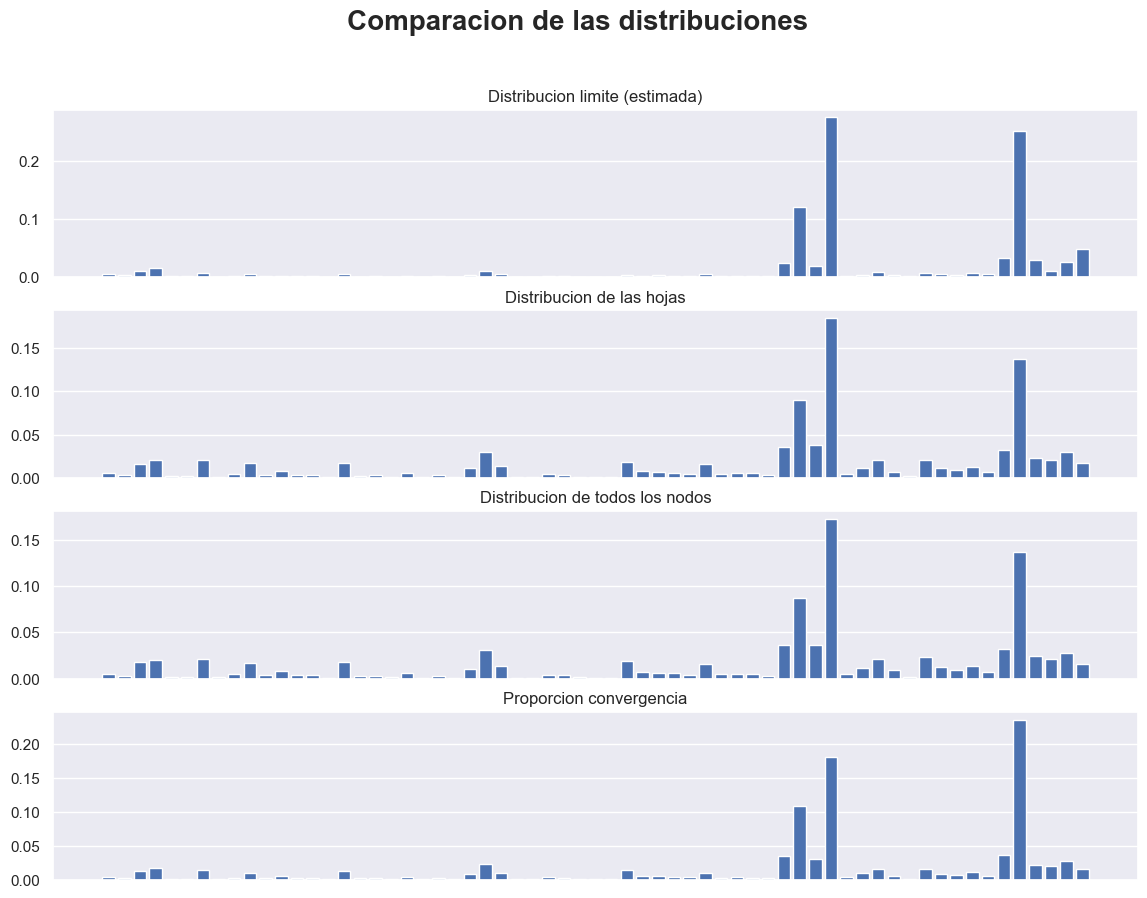

In [73]:
fig, ax = plt.subplots(4, 1, figsize = (14, 10))

# distribucion limite
plot_distribution(distribuciones[0], ax[0])
ax[0].set_title(nombres_distribuciones[0])

# distribucion de las hojas
plot_distribution(distribuciones[1], ax[1])
ax[1].set_title(nombres_distribuciones[1])

# distribucion de todos los nodos
plot_distribution(distribuciones[2], ax[2])
ax[2].set_title(nombres_distribuciones[2])

# proporcion convergencia
plot_distribution(distribuciones[3], ax[3])
ax[3].set_title(nombres_distribuciones[3])

ax[0].set_xticks([])
ax[1].set_xticks([])
ax[2].set_xticks([])
ax[3].set_xticks([])

# mostrar
fig.suptitle("Comparacion de las distribuciones", fontsize=20, fontweight='bold')
plt.show()

In [74]:
# calcular la kl_divergence de todos los pares posibles
kl_matrix = np.zeros((4, 4))

# iterar en los pares
for i in range(4):
    for j in range(4):
        # calccular la divergencia del par correspondiente
        kl_matrix[i, j] = KL_divergence(distribuciones[i], distribuciones[j])

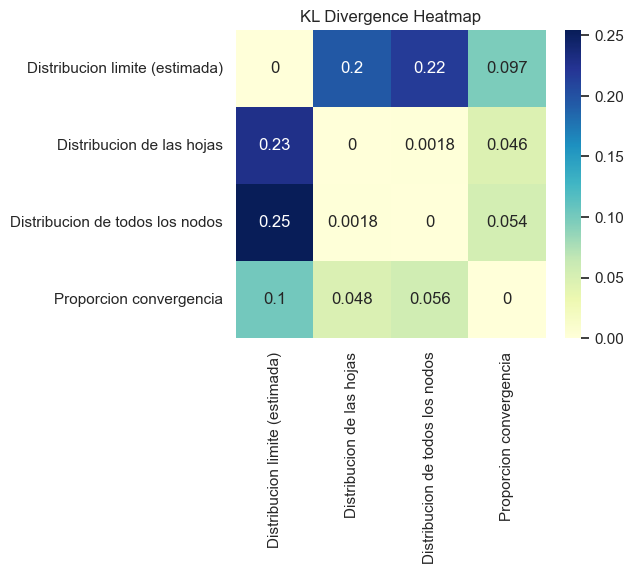

In [75]:
# Hacer un heatmap con esta informacion
sns.set()
plt.figure(figsize=(5, 4))
sns.heatmap(kl_matrix, annot=True, cmap="YlGnBu", 
            xticklabels=nombres_distribuciones, yticklabels=nombres_distribuciones)
plt.title("KL Divergence Heatmap")
plt.show()

Se puede ver que la distribucion convergencia explica la distribucion de etiquetas en los nodos de una mucho mejor forma que la distribucion limite de la cadena de markov.

### Esto refuerza la idea de que modelo propuesto (tipo multi-type branching process ), es bueno para modelar los datos, mas que simple markov.

## Ver unas cosas de teoría. Asumiendo que el modelo estimado si es el real.

In [76]:
# Por la construccion de la matriz, la matriz M del teorema es igual a PH
M = PH.T

In [77]:
# obtener el valor proprio de PERRON-FROBENIUS

# tomar valores propios
right_eigenvalues, right_eigenvectors = np.linalg.eig(M)

# ver el que tiene valor absoluto mayor
indx_r = np.where(right_eigenvalues == abs(right_eigenvalues).max())

# comprobar que solo es uno
assert len(indx_r) == 1

# tomar el eigen valor corresnpondiente, 
# la raiz de perron-frobenius
p_frobenius = right_eigenvalues[indx_r]

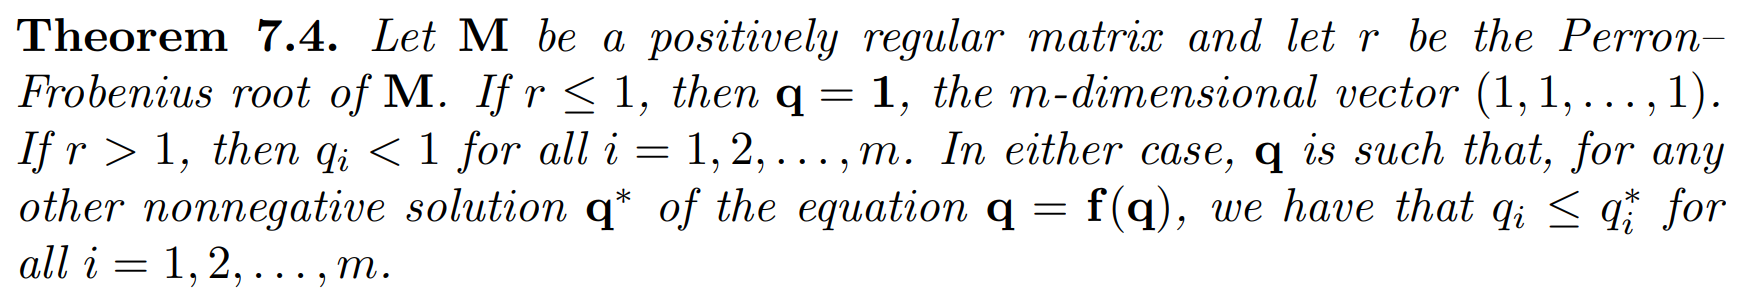

**q** $= (q_1, ..., q_m)$

Donde $q_i$ es la probabilidad de se extinga el proceso cuando $Z_0 = e_i$


In [78]:
p_frobenius

array([0.89152122+0.j])

Es menor a uno, entonces la probabilidad de extincion es de 1.


### WOW 

## Obtener las funciones $p_i(k)$ para cada tipo $i$ y $k \in N^{63}$

Se hace usando nuestro modelo. Recordar que, dado un tipo $i$, si $D^i$ es la descendencia. De modo que


$$
p_i(k) = P(D^i = k)
$$

Entonces, si $NH^i$ es el numero de hijos de ese tipo, luego

$$
p_i(k) = P(D^i = k | NH^i = ||k||_1 ) P(NH^i = ||k||_1)
$$

Donde $D^i | NH^i$ se distribuye **Multinomial**$(||k||_1, p)$, 
donde $p$ son las probabilidades asociadas de la cadena de markov de etiquetas

In [79]:
def NH_i(i, n):
    # obtener la probabilidad 
    # de que un tipo i tenga n hijos
    
    # tomar la muestra de  numero de hijos 
    # asociada a ese tipo del padre
    muestra_hijos_i = muestras_subj[i]
    
    # ver el numero de ocurrencias en la muestra
    num_ocurrencias = sum(muestra_hijos_i == n)
    
    # estimar la probabilidad con la division
    proba_estimada = num_ocurrencias/len(muestra_hijos_i)
    
    return proba_estimada

In [80]:
from scipy.stats import multinomial


def p_i(i, k):
    
    # ver que k sea valido
    assert len(k) == numero_subjects
    
    # la probabilidad para k = vector0
    # es solo la probabilidad de no tener hijos
    if sum(k) == 0:
        return NH_i(i, 0)
    
    # obtener las probabilidades de las etiquetas de los hijos
    # esto esta en la cadena de markov de etiquetas
    parametro_p = matriz_markov_estimada[i]
    
    # ver que si sume a 1
    assert(np.isclose(parametro_p.sum(), 1))
    
    # definir la multinomial que viene
    # de D|NH
    D_dado_NH =  multinomial(sum(k), parametro_p)
    
    # obtener la probabilidad
    probabilidad_k = D_dado_NH.pmf(k) * NH_i(i, sum(k))
    
    return probabilidad_k

In [81]:
# ejemplo 
idx_prueba = 6
k = np.array([0]*idx_prueba + [2]*1 + [0]*(numero_subjects - idx_prueba - 1))
print(p_i(idx_prueba, k))

0.023669050147457873


## Obtener la muestra de vectores de descendencia para cada tipo

Hacer un diccionario que de, para cada tipo, todos los vectores de descendencia que tienen a un padre con ese tipo

In [82]:
# se le dan los nodos 
# construye el vector de generacion correspondiente
# donde cada entrada son los nodos de un tipo
def get_vector_generacion(lista_nodos, grafo):
    
    # inicializar el vector en zeros
    vector_generacion = np.zeros(numero_subjects)
    
    # iterar en los nodos de la lista
    for nodo in lista_nodos:
        
        # obtener el indice de este nodo
        indice_etiqueta_nodo = get_etiqueta(nodo, grafo)
        
        # aumentar esa entrada del vector 
        vector_generacion[indice_etiqueta_nodo] += 1
        
    # devolver el vector de generacion
    return vector_generacion

In [83]:
# inicializar el diccionario
# las llaves son los tipos, sus indices
# los valores son todos los vectores de descendencia
muestras_vectores_descendencia = dict()

# inicializar todas las muestras como vacias
for idx_ in range(numero_subjects):
    # iniciar vacia
    muestras_vectores_descendencia[idx_] = []

In [84]:
# Ahora ir llenando las muestras

# iterar en los nodos
for nodo in grafo.nodes():
    
    # ver el tipo de ese nodo
    tipo_nodo = get_etiqueta(nodo, grafo)
    
    # tomar sus sucesores
    sucesores_nodo = list(grafo.successors(nodo))
    
    # tomar su vector de descendencia
    vector_descendencia = get_vector_generacion(sucesores_nodo, grafo)
    
    # añadirlo a la entrada correspondiente del diccionario
    # dependiendo del tipo del padre
    muestras_vectores_descendencia[tipo_nodo].append(vector_descendencia)

## Comparar las proporciones en la muestra con las probabilidades segun nuestro modelo

In [85]:
# para un tipo
# ver la muestra
# y ver las probabilidades y proporciones de los elementos
def ejemplo_proporcion_vs_probabilidad(idx_prueba, num_ver):
    
    print(f"Tipo: {idx_prueba}")
    print(idx_2_subj[idx_prueba])
    print("")

    # tomar la muestra
    muestra_ejemplo = muestras_vectores_descendencia[idx_prueba]
    print(f"Se tienen {len(muestra_ejemplo)} elementos en la muestra")

    # tomar los elementos unicos de la muestra
    elementos_unicos = np.unique(muestra_ejemplo, axis=0)
    print(f"En la muestra hay {len(elementos_unicos)} elementos unicos")
    print(" ")

    # ordenar segun la probabilidad teorica del modelo p_i(k)
    elementos_unicos = sorted(elementos_unicos, key= lambda k: p_i(idx_prueba, k), reverse=True)

    # para algunos elementos de la muestra
    # ver su probabilidad en nuestros p_i(k)
    # ver su proporcion en la muestra
    for k_idx in range(num_ver):

        # tomar un elemento de la muestra, de los unicos
        vector_ejemplo = elementos_unicos[k_idx]

        # tomar sus ocurrencias en la muestra
        ocurrencias = sum((muestra_ejemplo == vector_ejemplo).all(axis = 1))
        # ver su proporcion en la muestra
        proporcion  = ocurrencias/len(muestra_ejemplo)

        # tomar su probabilidad estimada teorica con nuestro modelo
        probabilidad_modelo = p_i(idx_prueba, vector_ejemplo)

        print(f"Proporcion: {proporcion:.3f}. Probabilidad: {probabilidad_modelo:.3f}")
    print("-"*50)

In [86]:
# ver ejemplos de algunos tipos
for i in range(20, 50):
    ejemplo_proporcion_vs_probabilidad(i, 10)

Tipo: 20
31—Potential theory

Se tienen 99 elementos en la muestra
En la muestra hay 29 elementos unicos
 
Proporcion: 0.646. Probabilidad: 0.646
Proporcion: 0.040. Probabilidad: 0.036
Proporcion: 0.010. Probabilidad: 0.013
Proporcion: 0.030. Probabilidad: 0.007
Proporcion: 0.010. Probabilidad: 0.007
Proporcion: 0.010. Probabilidad: 0.007
Proporcion: 0.010. Probabilidad: 0.005
Proporcion: 0.010. Probabilidad: 0.005
Proporcion: 0.010. Probabilidad: 0.002
Proporcion: 0.020. Probabilidad: 0.002
--------------------------------------------------
Tipo: 21
32—Several complex variables and analytic spaces

Se tienen 428 elementos en la muestra
En la muestra hay 81 elementos unicos
 
Proporcion: 0.682. Probabilidad: 0.682
Proporcion: 0.058. Probabilidad: 0.040
Proporcion: 0.033. Probabilidad: 0.015
Proporcion: 0.005. Probabilidad: 0.012
Proporcion: 0.002. Probabilidad: 0.008
Proporcion: 0.002. Probabilidad: 0.006
Proporcion: 0.007. Probabilidad: 0.004
Proporcion: 0.016. Probabilidad: 0.003
Pro

En la muestra hay 79 elementos unicos
 
Proporcion: 0.779. Probabilidad: 0.779
Proporcion: 0.033. Probabilidad: 0.027
Proporcion: 0.012. Probabilidad: 0.016
Proporcion: 0.010. Probabilidad: 0.009
Proporcion: 0.002. Probabilidad: 0.005
Proporcion: 0.004. Probabilidad: 0.004
Proporcion: 0.002. Probabilidad: 0.003
Proporcion: 0.002. Probabilidad: 0.003
Proporcion: 0.004. Probabilidad: 0.002
Proporcion: 0.002. Probabilidad: 0.002
--------------------------------------------------
Tipo: 38
53—Differential geometry

Se tienen 2082 elementos en la muestra
En la muestra hay 201 elementos unicos
 
Proporcion: 0.747. Probabilidad: 0.747
Proporcion: 0.063. Probabilidad: 0.064
Proporcion: 0.029. Probabilidad: 0.022
Proporcion: 0.013. Probabilidad: 0.010
Proporcion: 0.007. Probabilidad: 0.005
Proporcion: 0.005. Probabilidad: 0.004
Proporcion: 0.002. Probabilidad: 0.003
Proporcion: 0.004. Probabilidad: 0.002
Proporcion: 0.001. Probabilidad: 0.002
Proporcion: 0.001. Probabilidad: 0.002
--------------